In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/u5677455/Dropbox/DataSciencePortfolio/PoliceKillings/data/the-counted-2015.csv')
df = df.append(pd.read_csv('C:/Users/u5677455/Dropbox/DataSciencePortfolio/PoliceKillings/data/the-counted-2016.csv'))

In [318]:
df.shape

(2239, 14)

In [319]:
df.columns

Index(['uid', 'name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'classification',
       'lawenforcementagency', 'armed'],
      dtype='object')

In [320]:
len(df.uid.unique())

2239

In [321]:
df.raceethnicity.unique()

array(['Black', 'White', 'Hispanic/Latino', 'Asian/Pacific Islander',
       'Unknown', 'Native American', 'Arab-American', 'Other'], dtype=object)

In [322]:
df.classification.unique()

array(['Death in custody', 'Gunshot', 'Struck by vehicle', 'Taser', 'Other'], dtype=object)

In [323]:
df.groupby(['gender'])['gender'].count()

gender
Female             114
Male              2124
Non-conforming       1
Name: gender, dtype: int64

In [324]:
df['weapon'] = df.armed
df['armed'] = (df.armed!='No').astype(int)
df['unarmed'] = 1-df.armed

In [325]:
df['black'] = (df.raceethnicity=='Black').astype(int)
df['nonwhite'] = (df.raceethnicity!='White').astype(int)
df['nonmale'] = (df.gender!='Male').astype(int)
df['minority'] = ((df.black + df.nonwhite + df.nonmale)>0).astype(int)
df['woman'] = (df.gender=='Female').astype(int)

In [326]:
df['intentional'] = ((df['classification']=='Gunshot') | (df['classification']=='Gunshot')).astype(int)
df.head()

,uid,name,age,gender,raceethnicity,month,day,year,streetaddress,city,...,lawenforcementagency,armed,weapon,unarmed,black,nonwhite,nonmale,minority,woman,intentional
0,2,Matthew Ajibade,22,Male,Black,January,1,2015,1050 Carl Griffin Dr,Savannah,...,Chatham County Sheriff's Office,0,No,1,1,1,0,1,0,0
1,4,Lewis Lembke,47,Male,White,January,2,2015,4505 SW Masters Loop,Aloha,...,Washington County Sheriff's Office,1,Firearm,0,0,0,0,0,0,1
2,5,Michael Kocher Jr,19,Male,White,January,3,2015,2600 Kaumualii Hwy,Kaumakani,...,Kauai Police Department,0,No,1,0,0,0,0,0,0
3,6,John Quintero,23,Male,Hispanic/Latino,January,3,2015,500 North Oliver Ave,Wichita,...,Wichita Police Department,0,No,1,0,1,0,1,0,1
4,7,Tim Elliott,53,Male,Asian/Pacific Islander,January,2,2015,600 E Island Lake Dr,Shelton,...,Mason County Sheriff's Office,1,Firearm,0,0,1,0,1,0,1


In [327]:
dfs = df.loc[:,('unarmed','black','nonwhite','nonmale','minority','intentional','age','uid','woman')]
dfs.head()

,unarmed,black,nonwhite,nonmale,minority,intentional,age,uid,woman
0,1,1,1,0,1,0,22,2,0
1,0,0,0,0,0,1,47,4,0
2,1,0,0,0,0,0,19,5,0
3,1,0,1,0,1,1,23,6,0
4,0,0,1,0,1,1,53,7,0


In [328]:
dfs.loc[:,('black','nonwhite','nonmale','minority','unarmed')].mean()

black       0.255918
nonwhite    0.482805
nonmale     0.051362
minority    0.516749
unarmed     0.180884
dtype: float64

In [329]:
dfs.groupby(['unarmed'])[('black','nonwhite','nonmale','minority','unarmed')].mean()

,black,nonwhite,nonmale,minority,unarmed
unarmed,,,,,
0,0.246456,0.478190,0.041439,0.504362,0.0
1,0.298765,0.503704,0.096296,0.572840,1.0


In [330]:
from statsmodels.formula.api import logit
model = logit('unarmed ~ nonmale', dfs).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.468832
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                unarmed   No. Observations:                 2239
Model:                          Logit   Df Residuals:                     2237
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Nov 2017   Pseudo R-squ.:                0.008248
Time:                        13:42:58   Log-Likelihood:                -1049.7
converged:                       True   LL-Null:                       -1058.4
                                        LLR p-value:                 2.932e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5693      0.057    -27.314      0.000      -1.682      -1.457
nonmale        0.9021      0.

In [331]:
dfss = dfs.loc[df.intentional==1,:]
dfss.head()

,unarmed,black,nonwhite,nonmale,minority,intentional,age,uid,woman
1,0,0,0,0,0,1,47,4,0
3,1,0,1,0,1,1,23,6,0
4,0,0,1,0,1,1,53,7,0
5,0,0,0,0,0,1,32,8,0
6,0,0,1,0,1,1,22,9,0


In [332]:
model = logit('unarmed ~ nonwhite', dfss).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.340518
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                unarmed   No. Observations:                 2028
Model:                          Logit   Df Residuals:                     2026
Method:                           MLE   Df Model:                            1
Date:                Wed, 15 Nov 2017   Pseudo R-squ.:                0.002132
Time:                        13:42:58   Log-Likelihood:                -690.57
converged:                       True   LL-Null:                       -692.05
                                        LLR p-value:                   0.08579
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2413      0.105    -21.416      0.000      -2.446      -2.036
nonwhite       0.2466      0.

In [333]:
model = logit('unarmed ~ nonmale + nonwhite', dfss).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.339125
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                unarmed   No. Observations:                 2028
Model:                          Logit   Df Residuals:                     2025
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Nov 2017   Pseudo R-squ.:                0.006215
Time:                        13:42:58   Log-Likelihood:                -687.75
converged:                       True   LL-Null:                       -692.05
                                        LLR p-value:                   0.01356
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.2942      0.108    -21.230      0.000      -2.506      -2.082
nonmale        0.7110      0.

In [334]:
dfss.mean()

unarmed        1.074951e-01
black          2.514793e-01
nonwhite       4.817554e-01
nonmale        4.536489e-02
minority       5.113412e-01
intentional    1.000000e+00
uid            1.687414e+06
woman          4.487179e-02
dtype: float64

In [335]:
dfss['white'] = 1 - dfss.nonwhite
dfss['male'] = 1 - dfss.nonmale
dfss.groupby(['unarmed']).sum()

C:\Users\u5677455\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\u5677455\AppData\Local\Continuum\Anaconda2\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,black,nonwhite,nonmale,minority,intentional,uid,woman,white,male
unarmed,,,,,,,,,
0,440,860,75,907,1810,3138284600,75,950,1735
1,70,117,17,130,218,283791383,16,101,201


In [385]:
plotdata = dfss.groupby(['unarmed']).sum()
plotdata = plotdata.loc[:,('black','nonwhite','woman','white','male')]

In [386]:
plotdata = plotdata.append(plotdata.sum(),ignore_index=True)
x = list(plotdata.columns)
y = list(plotdata.loc[1]/plotdata.loc[2])

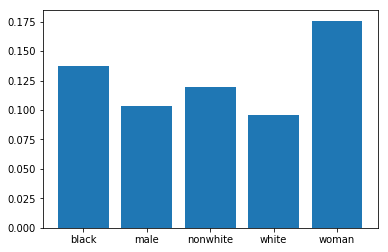

In [387]:
plt.bar(x,y)
plt.show()